### Topic Modeling

In [1]:
!pip install nltk
!pip install pandas
!pip install matplotlib
!pip install networkx  
!pip install pdfplumber
!pip install python-docx

In [2]:
!pip install gensim

In [3]:
!pip install pyLDAvis

In [2]:
import os
import pdfplumber
import docx

def extract_text_from_pdf(pdf_path):
    text = ''
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() or ''
    return text

def extract_text_from_docx(docx_path):
    doc = docx.Document(docx_path)
    return " ".join([para.text for para in doc.paragraphs])


def load_documents(directory):
    docs = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if filename.endswith('.pdf'):
            docs.append(extract_text_from_pdf(file_path))
        elif filename.endswith('.docx'):
            docs.append(extract_text_from_docx(file_path))
    return docs

directory = r"C:\Users\u\OneDrive - Swinburne University\Policy Documents\Policy docs-Ind"

docs = load_documents(directory)



In [3]:
import re
import spacy
import nltk

nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    
    lower_text = re.sub(r'\d+', '', text.lower())
    doc = nlp(lower_text)
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    clean_text = " ".join(tokens)
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    return clean_text

processed_docs = [preprocess_text(doc) for doc in docs]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\u\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\u\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
from gensim import corpora, models

tokenized_docs = [doc.split() for doc in processed_docs]

dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10, random_state=100)

topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")

pyLDAvis.enable_notebook()

vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

pyLDAvis.display(vis_data)

pyLDAvis.save_html(vis_data, 'India_lda_visualization.html')


Topic 0: 0.019*"project" + 0.014*"date" + 0.012*"solar" + 0.012*"item" + 0.011*"list" + 0.010*"manufacturer" + 0.009*"module" + 0.009*"almm" + 0.008*"order" + 0.008*"state"
Topic 1: 0.028*"solar" + 0.021*"pump" + 0.021*"power" + 0.019*"kusum" + 0.019*"pm" + 0.019*"farmer" + 0.014*"new" + 0.014*"green" + 0.010*"plant" + 0.010*"scheme"
Topic 2: 0.026*"consumer" + 0.023*"solar" + 0.021*"plant" + 0.020*"power" + 0.017*"electricity" + 0.015*"rs" + 0.012*"cost" + 0.011*"state" + 0.010*"unit" + 0.010*"vnm"
Topic 3: 0.035*"wind" + 0.028*"solar" + 0.025*"project" + 0.018*"hybrid" + 0.018*"power" + 0.016*"charge" + 0.013*"energy" + 0.012*"transmission" + 0.012*"ist" + 0.011*"system"
Topic 4: 0.027*"programme" + 0.012*"energy" + 0.012*"bioenergy" + 0.010*"power" + 0.010*"mnre" + 0.010*"national" + 0.010*"support" + 0.008*"project" + 0.008*"set" + 0.008*"press"


### Word Count

In [35]:
pip install wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.


In [6]:
from collections import Counter

all_text = ' '.join(processed_docs)  
word_counts = Counter(all_text.split())  

Word cloud saved as 'India_wordcloud.html'.


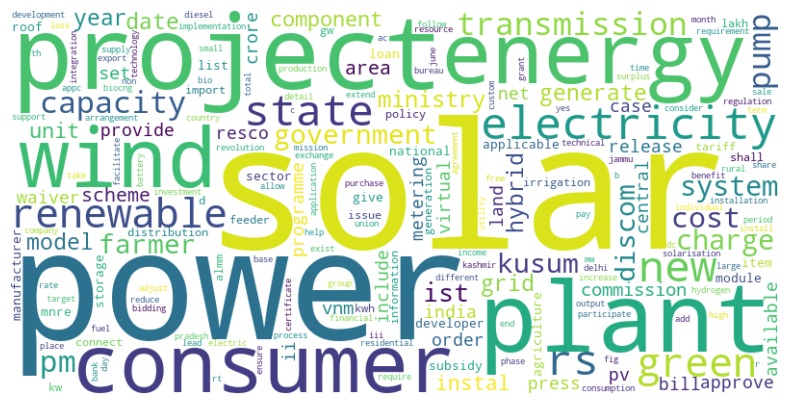

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=200).generate_from_frequencies(word_counts)

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objs as go
from PIL import Image
import numpy as np
from collections import Counter

all_text = ' '.join(processed_docs)  
word_counts = Counter(all_text.split())

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate_from_frequencies(word_counts)

wordcloud_image = wordcloud.to_image()

wordcloud_array = np.array(wordcloud_image)

trace = go.Image(z=wordcloud_array)

layout = go.Layout(
    xaxis=dict(showgrid=False, showticklabels=False, zeroline=False),
    yaxis=dict(showgrid=False, showticklabels=False, zeroline=False),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig = go.Figure(data=[trace], layout=layout)

fig.write_html('India_wordcloud.html')

print("Word cloud saved as 'India_wordcloud.html'.")

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis('off') 
plt.show()
